<a href="https://colab.research.google.com/github/e101sg/IoT/blob/master/ACV_Quickdraw_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Quick Draw challenge** --Chandra Sekar Veerappan

1) load data  
2) preprocessing data  
3) pipeline  
4) make a model  
5) train   
6) evaluate   
7) Inference


In [ ]:

!wget -qq https://www.dropbox.com/s/gdlb8dnjzcly51o/quickdraw.zip
  
!unzip -qq quickdraw.zip

!rm -r __MACOSX
!rm quickdraw.zip

!ls

In [3]:
!ls quickdraw

'alarm clock.npy'   bee.npy		 cookie.npy	  lollipop.npy
 ambulance.npy	   'birthday cake.npy'	 donut.npy	 'palm tree.npy'
 angel.npy	    brain.npy		 eyeglasses.npy   pig.npy
 ant.npy	    cactus.npy		 face.npy	  postcard.npy
 banana.npy	    cat.npy		 fish.npy	  rainbow.npy


## Imports

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np
from glob import glob
import ntpath
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os
from tensorflow.keras import layers,models,datasets
from tensorflow import keras 
import tensorflow as tf


In [5]:
arr = np.load('./quickdraw/face.npy')
arr.shape

(161666, 784)

In [6]:
file_names = glob('./quickdraw/*.npy')
print(file_names)

['./quickdraw/banana.npy', './quickdraw/cookie.npy', './quickdraw/cactus.npy', './quickdraw/face.npy', './quickdraw/bee.npy', './quickdraw/ant.npy', './quickdraw/rainbow.npy', './quickdraw/alarm clock.npy', './quickdraw/eyeglasses.npy', './quickdraw/ambulance.npy', './quickdraw/lollipop.npy', './quickdraw/cat.npy', './quickdraw/fish.npy', './quickdraw/postcard.npy', './quickdraw/brain.npy', './quickdraw/angel.npy', './quickdraw/donut.npy', './quickdraw/pig.npy', './quickdraw/birthday cake.npy', './quickdraw/palm tree.npy']


In [7]:
!ls 

quickdraw  sample_data


In [8]:
# get 200 of each class for plotting

x_data =np.array([])
y_labels =np.array([])

for i, filename in enumerate(file_names):
  labels = [i for j in range(200)]
  arr = np.load(filename)
  arr = arr[:200]
  if len(x_data) == 0:
    x_data = arr
    y_labels = np.asarray(labels)
  else:
    x_data = np.concatenate((x_data, arr))
    y_labels = np.concatenate((y_labels, labels))

In [51]:
num_classes =(len(file_names))
print(num_classes)

20


In [52]:
y_labels.shape

(200000,)

In [11]:
print(len(x_data))

4000


In [12]:
y_labels[190:210]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## For MNIST

In [13]:
(mnist_x,mnist_y), (_,_) = tf.keras.datasets.mnist.load_data()
mnist_x =mnist_x.reshape(60000,784)

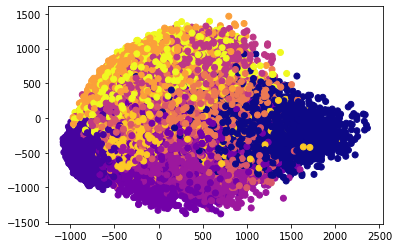

In [14]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mnist_x)
groups = mnist_y.tolist()
colors = [int(i % 20) for i in groups]

plt.scatter(principalComponents[:,0], principalComponents[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

## PCA for QuickDraw

(2000, 2)


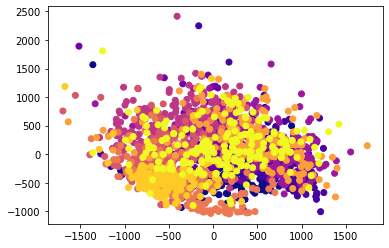

In [15]:
# from sklearn.preprocessing import StandardScaler
# x = StandardScaler().fit_transform(x_data)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_data[:2000])

print(principalComponents.shape)

groups = y_labels.tolist()
colors = [int(i % 20) for i in groups[:2000]]

plt.scatter(principalComponents[:,0], principalComponents[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

## Plot TSNE  for QuickDraw

In [16]:
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_data[:2000])

print('t-SNE Finished! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.165s...
[t-SNE] Computed neighbors for 2000 samples in 8.020s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 614.766038
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.109772
[t-SNE] KL divergence after 300 iterations: 1.955485
t-SNE Finished! Time elapsed: 18.655958890914917 seconds


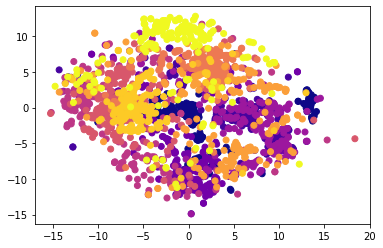

In [17]:
import matplotlib.cm as cm

groups = y_labels.tolist()

colors = [int(i % 20) for i in groups[:2000]]

plt.scatter(tsne_results[:,0], tsne_results[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

In [19]:
x_data =np.array([])
y_labels =np.array([])

for i, filename in enumerate(file_names):
  labels = [i for j in range(10000)]
  arr = np.load(filename)
  arr = arr[:10000]
  if len(x_data) == 0:
    x_data = arr
    y_labels = np.asarray(labels)
  else:
    x_data = np.concatenate((x_data, arr))
    y_labels = np.concatenate((y_labels, labels))

In [20]:
x_data.shape, y_labels.shape

((200000, 784), (200000,))

In [21]:
y_labels[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [22]:
# Shuffle
from sklearn.utils import shuffle

x_data, y_labels = shuffle(x_data, y_labels, random_state=42)


# Train test split
from sklearn.model_selection import train_test_split

split = 0.9

x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.1, random_state=42)


x_train.shape, y_train.shape

((180000, 784), (180000,))

In [23]:
y_labels[:50]

array([11,  7, 15,  6,  3,  2, 13, 17, 13,  0,  7, 14, 18,  8, 11, 11, 10,
       18,  0, 17, 16,  3,  2, 15,  0,  0,  0, 13, 19,  4, 13,  0,  2,  0,
       11,  9,  3, 12,  1,  6,  6, 16,  5, 12, 14, 14, 13,  7, 19,  6])

## Prepare data for network

## Data Pipeline

In [54]:
# Reshape and normalize
image_size =28
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(num_classes)

20


## Model

In [31]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(20, activation='softmax')) 
# Train model
model.compile(optimizer = tf.keras.optimizers.Adam(),loss = 'categorical_crossentropy',metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)              

## Train

In [32]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)

Epoch 1/5
633/633 - 107s - loss: 0.9779 - top_k_categorical_accuracy: 0.9241 - val_loss: 0.6089 - val_top_k_categorical_accuracy: 0.9625
Epoch 2/5
633/633 - 105s - loss: 0.5459 - top_k_categorical_accuracy: 0.9664 - val_loss: 0.4906 - val_top_k_categorical_accuracy: 0.9691
Epoch 3/5
633/633 - 105s - loss: 0.4524 - top_k_categorical_accuracy: 0.9718 - val_loss: 0.4403 - val_top_k_categorical_accuracy: 0.9722
Epoch 4/5
633/633 - 104s - loss: 0.3999 - top_k_categorical_accuracy: 0.9754 - val_loss: 0.4059 - val_top_k_categorical_accuracy: 0.9746
Epoch 5/5
633/633 - 106s - loss: 0.3631 - top_k_categorical_accuracy: 0.9775 - val_loss: 0.3868 - val_top_k_categorical_accuracy: 0.9762


## Evaluate 

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 97.68%


## **Inference**

['./quickdraw/cookie.npy', './quickdraw/ant.npy', './quickdraw/lollipop.npy']


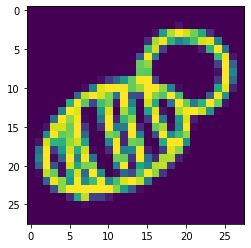

In [63]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
num_classes =20
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:3]
latex = [file_names[x] for x in ind]
print(latex)